Gender: Gender of the passengers (Female, Male)  
Customer Type: The customer type (Loyal customer, disloyal customer)  
Age: The actual age of the passengers  
Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)  
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)  
Flight distance: The flight distance of this journey  
Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)  
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient  
Ease of Online booking: Satisfaction level of online booking  
Gate location: Satisfaction level of Gate location  
Food and drink: Satisfaction level of Food and drink  
Online boarding: Satisfaction level of online boarding  
Seat comfort: Satisfaction level of Seat comfort  
Inflight entertainment: Satisfaction level of inflight entertainment  
On-board service: Satisfaction level of On-board service  
Leg room service: Satisfaction level of Leg room service  
Baggage handling: Satisfaction level of baggage handling  
Check-in service: Satisfaction level of Check-in service  
Inflight service: Satisfaction level of inflight service  
Cleanliness: Satisfaction level of Cleanliness  
Departure Delay in Minutes: Minutes delayed when departure  
Arrival Delay in Minutes: Minutes delayed when Arrival  
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction) 

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [253]:
airline = pd.read_csv("data/train_airline.csv")

In [254]:
airline.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [255]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [256]:
airline.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

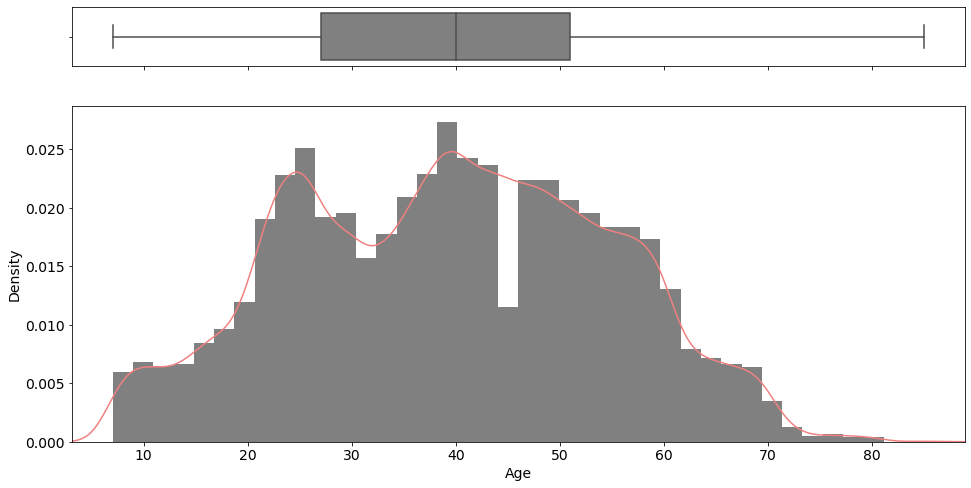

In [257]:
plt.rcParams['font.size'] = 14
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(16, 8))
# boxplot (seaborn)
sns.boxplot(x=airline["Age"],color="gray", ax=ax_box)
ax_box.set(xlabel='')
# histogram (matplotlib)
ax_hist.hist(airline["Age"], bins=40, density=True, color="gray")
# kde plot (pandas series)
min_, max_ = plt.xlim()
plt.xlim(min_, max_)
airline["Age"].plot.kde(color="lightcoral")
ax_hist.set(xlabel='Age')

plt.show()

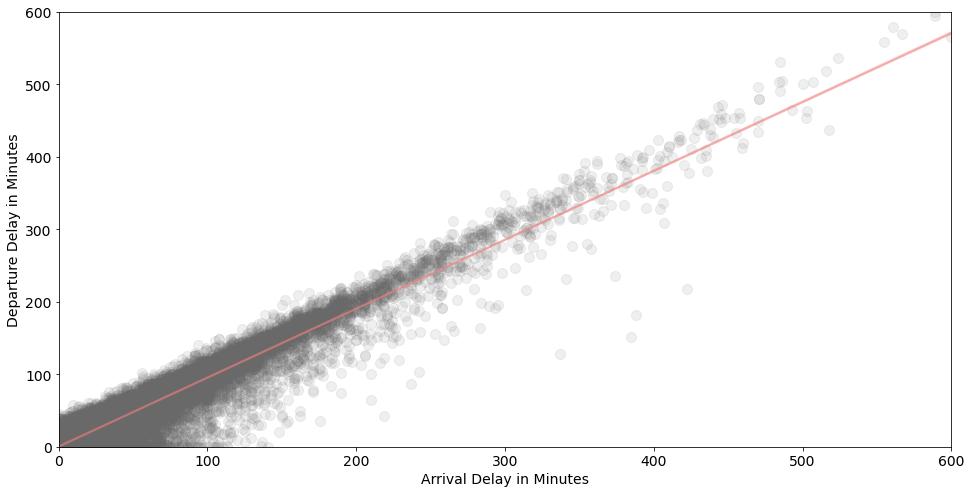

In [258]:
plt.figure(figsize=(16, 8))
sns.regplot(x="Arrival Delay in Minutes", y="Departure Delay in Minutes",data=airline,
            scatter_kws={"s": 100, "color": "dimgray", "alpha":0.1},
            line_kws={"color" : "lightcoral", "alpha":0.6})
plt.xlim(0, 600)
plt.ylim(0, 600)
plt.show()

In [259]:
def height_notation(plot_name , coordinator , dataframe , color="white", percent = False):
    total = len(dataframe)
    for p in plot_name.patches:
        height = p.get_height().round(2)
        text = str(float(height))
        if percent == True:
            plot_name.text(p.get_x() + p.get_width() / 2 , height + coordinator , text + ' | ' + str(height * 100 // total) + '%' , ha = 'center', color="white")
        else:
            plot_name.text(p.get_x() + p.get_width() / 2 , height + coordinator , text , ha = 'center', color=color)

In [260]:
delay_per_class = airline.groupby("Class").agg({"Arrival Delay in Minutes" : np.mean})

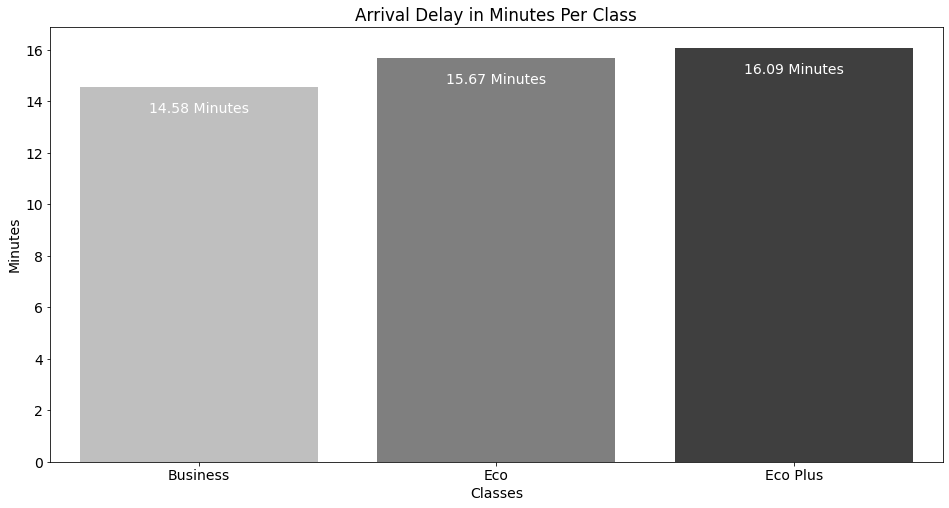

In [261]:
plt.figure(figsize=(16, 8))
sns.barplot(x=delay_per_class.index, y=delay_per_class["Arrival Delay in Minutes"], palette="binary")
xlocs, xlabs = plt.xticks()
for i, v in enumerate(delay_per_class["Arrival Delay in Minutes"]):
    plt.text(xlocs[i], v - 1, str(np.round(v, 2)) + " " + "Minutes", ha = 'center', color="white")
plt.ylabel("Minutes")
plt.xlabel("Classes")
plt.title("Arrival Delay in Minutes Per Class")
plt.show()

# Loyal 

In [262]:
type_satisfaction_customer = pd.crosstab(airline["Type of Travel"], [airline["satisfaction"],
                                         airline["Customer Type"]], normalize=True)
satisfied = type_satisfaction_customer.iloc[:, type_satisfaction_customer.columns.get_level_values(0)=='satisfied']
dissatisfied = type_satisfaction_customer.iloc[:, type_satisfaction_customer.columns.get_level_values(0)=='neutral or dissatisfied']

In [263]:
type_satisfaction_customer

satisfaction    neutral or dissatisfied                        satisfied  \
Customer Type            Loyal Customer disloyal Customer Loyal Customer   
Type of Travel                                                             
Business travel                0.149734          0.138118       0.358793   
Personal Travel                0.277487          0.001328       0.031308   

satisfaction                       
Customer Type   disloyal Customer  
Type of Travel                     
Business travel          0.042982  
Personal Travel          0.000250

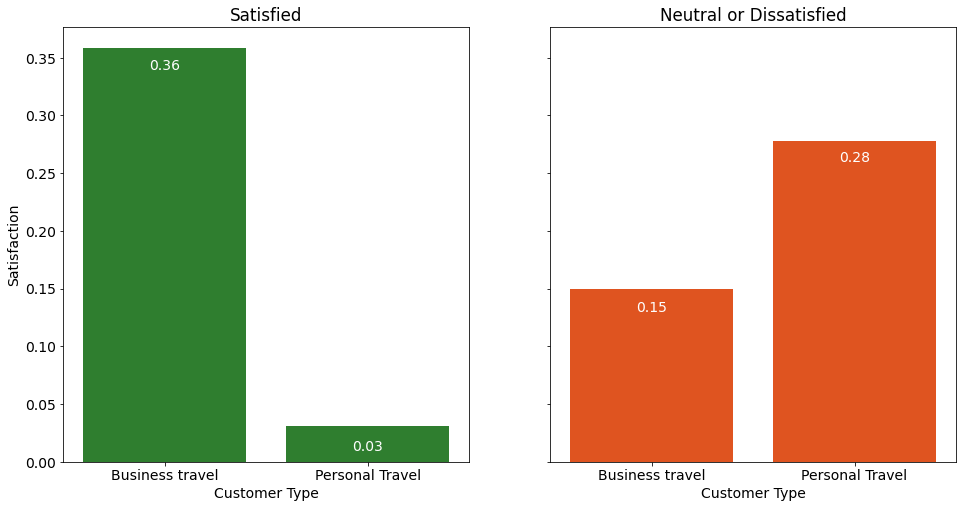

In [264]:
fig, axis = plt.subplots(1, 2, figsize = (16, 8), sharey=True)
satisfied_plot = sns.barplot(x=satisfied.index, y=satisfied["satisfied", "Loyal Customer"],
                             data=satisfied, ax = axis[0], palette=["forestgreen", "forestgreen"])
height_notation(satisfied_plot, - 0.02, satisfied)
satisfied_plot.set_xlabel("Customer Type")
satisfied_plot.set_ylabel("Satisfaction")
satisfied_plot.set_title("Satisfied")

dissatisfied_plot = sns.barplot(x=dissatisfied.index, y=dissatisfied["neutral or dissatisfied", "Loyal Customer"],
                                data = dissatisfied, ax = axis[1], palette=["orangered", "orangered"])
height_notation(dissatisfied_plot, - 0.02, dissatisfied)
dissatisfied_plot.set_xlabel("Customer Type")
dissatisfied_plot.set_ylabel("")
dissatisfied_plot.set_title("Neutral or Dissatisfied")
plt.show()

# Disloyal

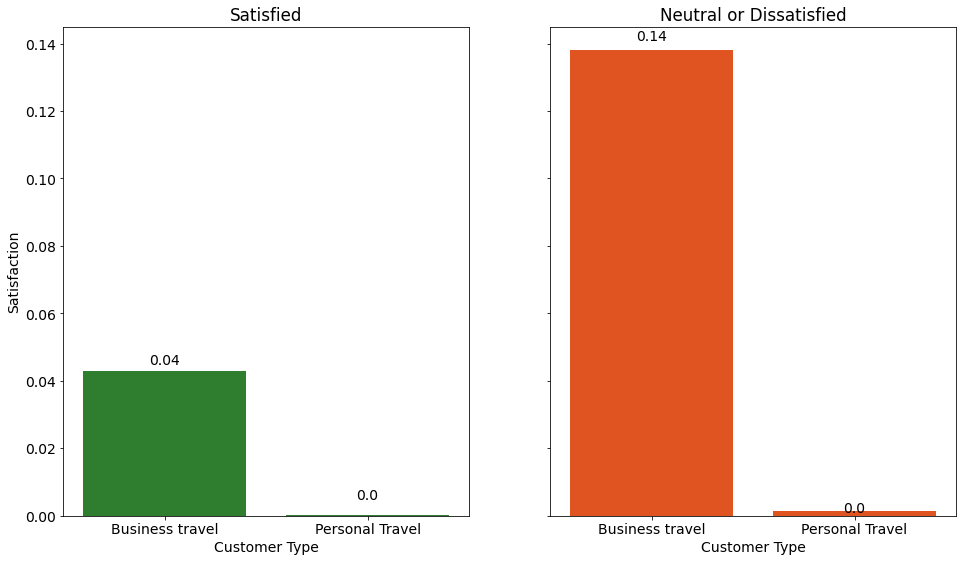

In [265]:
fig, axis = plt.subplots(1, 2, figsize = (16, 9), sharey=True)
satisfied_plot = sns.barplot(x=satisfied.index, y=satisfied["satisfied", "disloyal Customer"],
                             data=satisfied, ax = axis[0], palette=["forestgreen", "forestgreen"])
height_notation(satisfied_plot, + 0.005, satisfied, color="black")
satisfied_plot.set_xlabel("Customer Type")
satisfied_plot.set_ylabel("Satisfaction")
satisfied_plot.set_title("Satisfied")

dissatisfied_plot = sns.barplot(x=dissatisfied.index, y=dissatisfied["neutral or dissatisfied", "disloyal Customer"],
                                data = dissatisfied, ax = axis[1], palette=["orangered", "orangered"])
height_notation(dissatisfied_plot, + 0.001, dissatisfied, color="black")
dissatisfied_plot.set_xlabel("Customer Type")
dissatisfied_plot.set_ylabel("")
dissatisfied_plot.set_title("Neutral or Dissatisfied")
plt.show()

heatmap

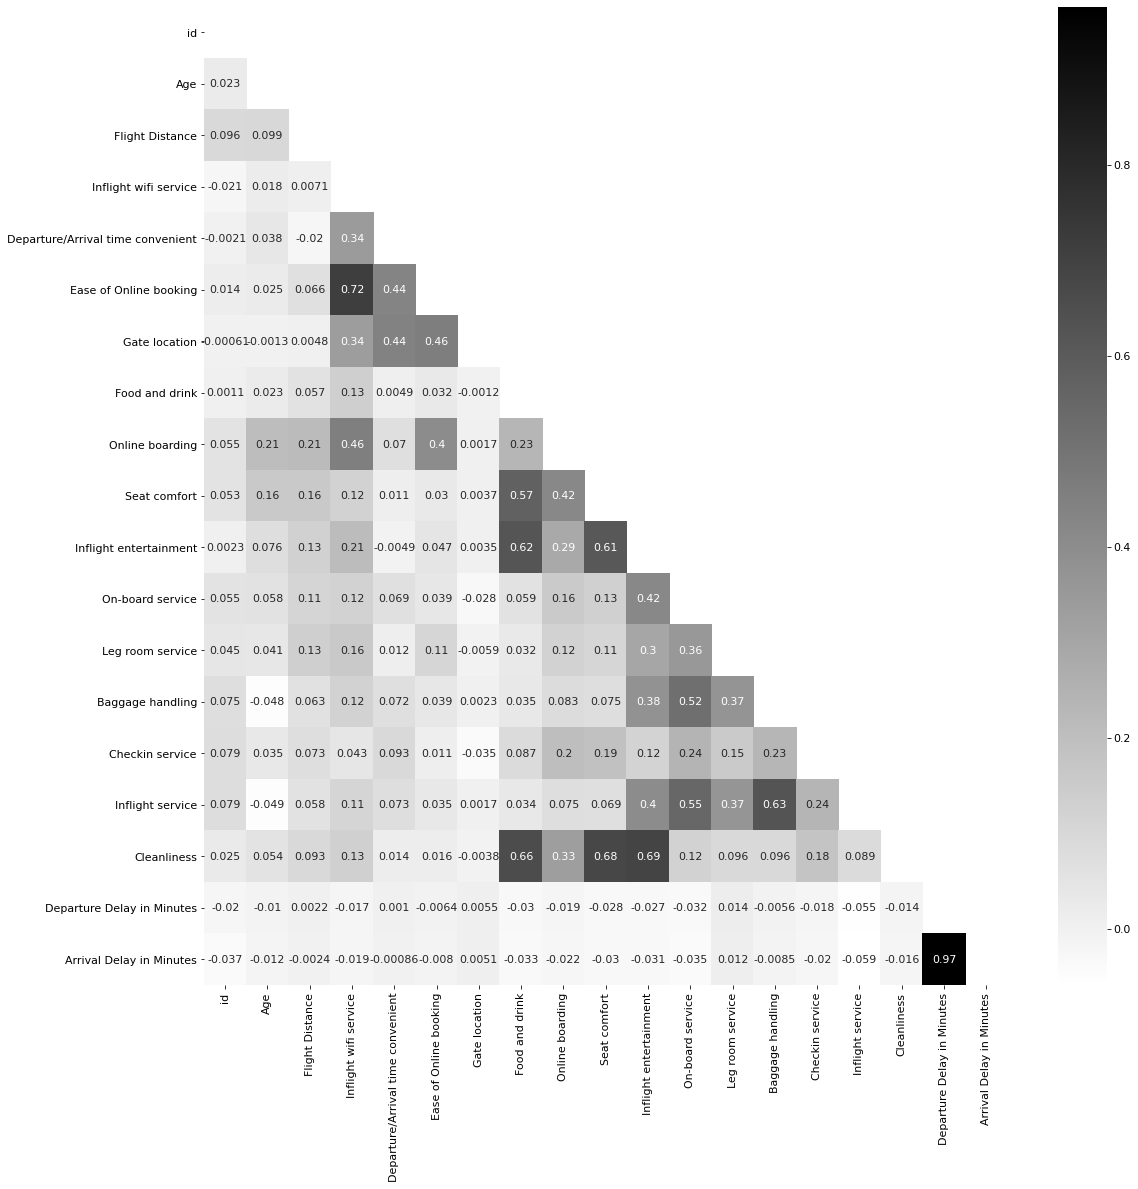

In [269]:
plt.rcParams['font.size'] = 11
plt.figure(figsize=(18, 18))
matrix = np.triu(airline.corr())
sns.heatmap(airline.corr(), annot=True, mask=matrix, cmap="binary")
plt.show()

# Gender Satisfaction

In [281]:
gender_satisfaction = pd.crosstab(airline["Gender"], airline["satisfaction"], normalize=True)

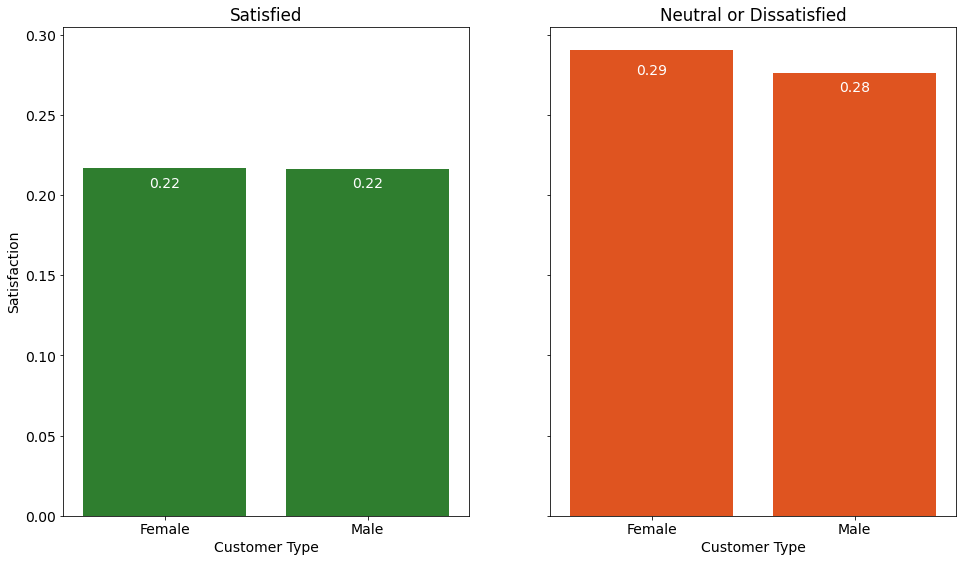

In [289]:
fig, axis = plt.subplots(1, 2, figsize = (16, 9), sharey=True)
satisfied_plot = sns.barplot(x=gender_satisfaction.index, y=gender_satisfaction["satisfied"],
                             data=satisfied, ax = axis[0], palette=["forestgreen", "forestgreen"])
height_notation(satisfied_plot, - 0.015, satisfied)
satisfied_plot.set_xlabel("Customer Type")
satisfied_plot.set_ylabel("Satisfaction")
satisfied_plot.set_title("Satisfied")

dissatisfied_plot = sns.barplot(x=gender_satisfaction.index, y=gender_satisfaction["neutral or dissatisfied"],
                                data = dissatisfied, ax = axis[1], palette=["orangered", "orangered"])
height_notation(dissatisfied_plot, - 0.015, dissatisfied)
dissatisfied_plot.set_xlabel("Customer Type")
dissatisfied_plot.set_ylabel("")
dissatisfied_plot.set_title("Neutral or Dissatisfied")
plt.show()